***Name - Riyaan Chatterjee PRN - 23070126507 AIML B3***
_________________________________________________________________


#### **For B3 From "Title" predict "Label" i.e 0-Fake, 1-Real**

*In this task, the goal is to predict whether a news title is fake or real based on its text content. We'll achieve this using Natural Language Processing (NLP) techniques and various Machine Learning models.*

*Importing Necessary Library*

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

 *Importing Dataset*

In [2]:
df = pd.read_csv('/content/WELFake_Dataset.csv', on_bad_lines='skip')

# Check the first few rows
df.head(5)


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


*2. Preprocessing Steps Using NLTK
You'll perform text preprocessing steps like tokenization, lemmatization, and data cleansing using NLTK.*

*a) Tokenization, Lemmatization*

*The dataset is loaded using pandas.read_csv. The on_bad_lines='skip' parameter helps in handling any malformed lines in the CSV file.
We display the first few rows to get an overview of the data structure.*

*Text preprocessing is crucial to converting raw text into a format that machine learning algorithms can process. We'll perform the following steps:*

In [3]:
print(df.columns)

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')


In [4]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    if isinstance(text, str):  # Check if the text is a string
        tokens = word_tokenize(text.lower())
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        return ' '.join(lemmatized_tokens)
    else:
        return ''  # Return an empty string if the text is not a string

# Apply the function to the title column
df['cleaned_text'] = df['title'].apply(tokenize_and_lemmatize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


*b) Data Cleansing: Remove Stopwords, Symbols, URLs*

In [5]:
import re
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove symbols and special characters
    text = re.sub(r'\@\w+|\#|\d+', '', text)

    # Tokenization and Stopwords Removal
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(filtered_tokens)

# Apply the function to the cleaned text column
df['cleaned_text'] = df['cleaned_text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


*Explanation:*

*Removing URLs: Using regular expressions (re.sub), we remove any links from the text.
Removing Symbols: We also strip out any special characters, symbols, and digits.
Stopwords Removal: Stopwords (common words like "and", "the") are removed as they don't contribute much to the meaning.*

*3. Vectorize Data Using CountVectorizer and TFIDFVectorizer
Convert the text data into numerical form using CountVectorizer and TFIDFVectorizer.*

In [6]:
# Initialize vectorizers
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text
X_count = count_vectorizer.fit_transform(df['cleaned_text'])
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Define target variable
y = df['label']


*CountVectorizer: Converts text data into a matrix of token counts, where each unique word in the corpus is represented by a feature.*

*4. Train Machine Learning Models
Train Logistic Regression, SVC, and Random Forest models using both CountVectorizer and TF-IDFVectorizer features.*

*TFIDFVectorizer: Converts text data into a matrix of TF-IDF features, where TF-IDF (Term Frequency-Inverse Document Frequency) gives a score that represents how important a word is in a document relative to the entire corpus.*

In [7]:
# Split the data into training and testing sets
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Logistic Regression with CountVectorizer
lr_count = LogisticRegression(max_iter=2000)
lr_count.fit(X_train_count, y_train)
y_pred_lr_count = lr_count.predict(X_test_count)

# Logistic Regression with TFIDFVectorizer
lr_tfidf = LogisticRegression(max_iter=2000)
lr_tfidf.fit(X_train_tfidf, y_train)
y_pred_lr_tfidf = lr_tfidf.predict(X_test_tfidf)

# SVC with CountVectorizer
svc_count = SVC()
svc_count.fit(X_train_count, y_train)
y_pred_svc_count = svc_count.predict(X_test_count)

# SVC with TFIDFVectorizer
svc_tfidf = SVC()
svc_tfidf.fit(X_train_tfidf, y_train)
y_pred_svc_tfidf = svc_tfidf.predict(X_test_tfidf)

# Random Forest with CountVectorizer
rf_count = RandomForestClassifier()
rf_count.fit(X_train_count, y_train)
y_pred_rf_count = rf_count.predict(X_test_count)

# Random Forest with TFIDFVectorizer
rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(X_train_tfidf, y_train)
y_pred_rf_tfidf = rf_tfidf.predict(X_test_tfidf)


*5. Compare the Results
Evaluate the performance of each model using a classification report and confusion matrix with a heatmap.*

Classification Report for Logistic Regression with CountVectorizer:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      7089
           1       0.90      0.92      0.91      7338

    accuracy                           0.91     14427
   macro avg       0.91      0.91      0.91     14427
weighted avg       0.91      0.91      0.91     14427



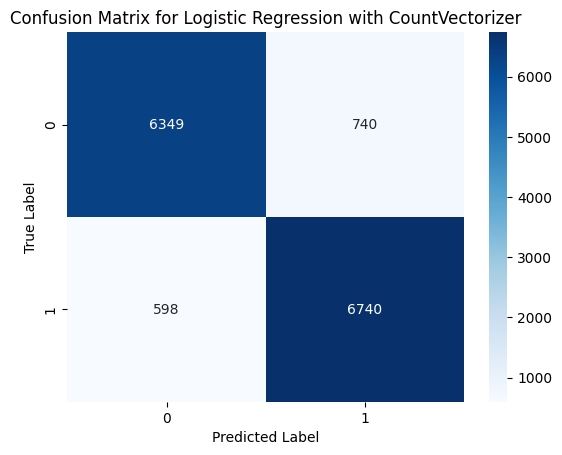

Classification Report for Logistic Regression with TFIDFVectorizer:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      7089
           1       0.89      0.92      0.91      7338

    accuracy                           0.90     14427
   macro avg       0.90      0.90      0.90     14427
weighted avg       0.90      0.90      0.90     14427



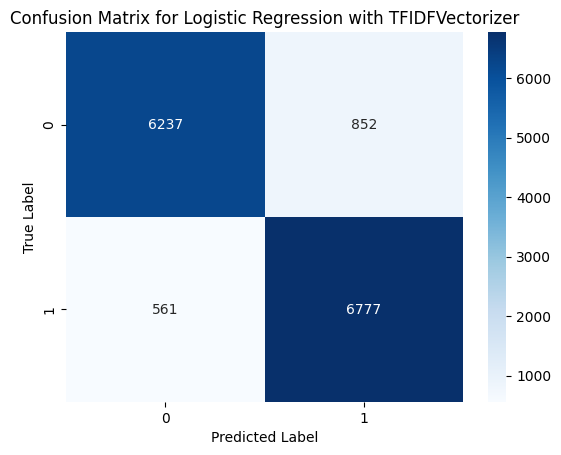

Classification Report for SVC with CountVectorizer:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      7089
           1       0.90      0.94      0.92      7338

    accuracy                           0.92     14427
   macro avg       0.92      0.91      0.91     14427
weighted avg       0.92      0.92      0.91     14427



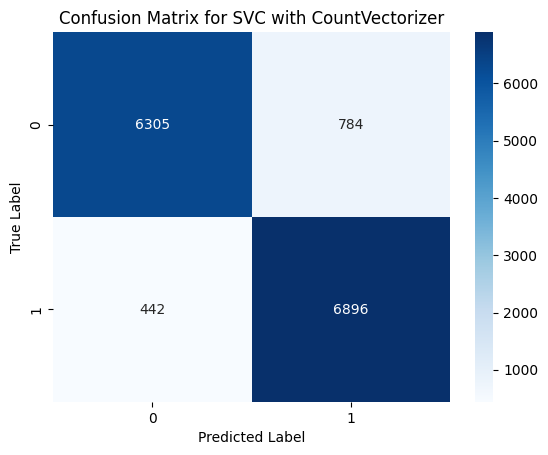

Classification Report for SVC with TFIDFVectorizer:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92      7089
           1       0.91      0.94      0.92      7338

    accuracy                           0.92     14427
   macro avg       0.92      0.92      0.92     14427
weighted avg       0.92      0.92      0.92     14427



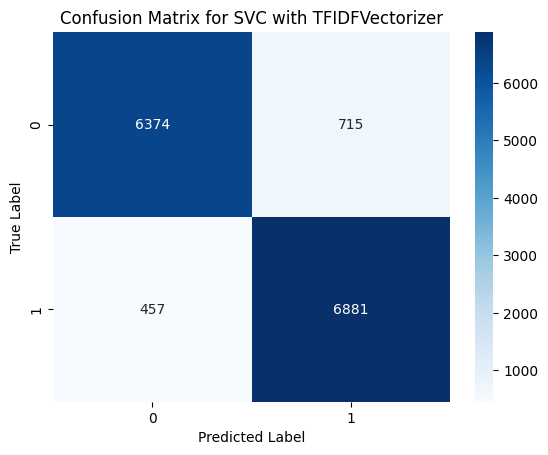

Classification Report for Random Forest with CountVectorizer:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      7089
           1       0.90      0.92      0.91      7338

    accuracy                           0.90     14427
   macro avg       0.90      0.90      0.90     14427
weighted avg       0.90      0.90      0.90     14427



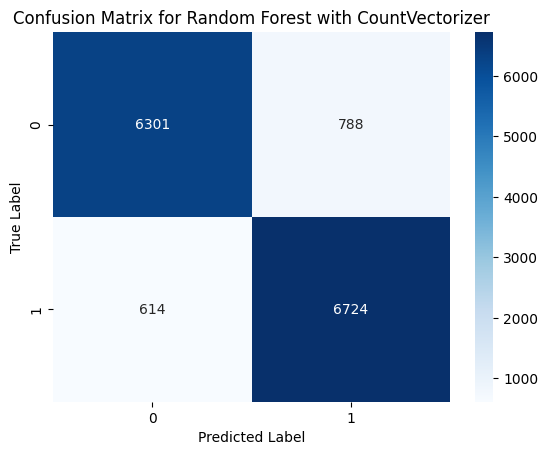

Classification Report for Random Forest with TFIDFVectorizer:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      7089
           1       0.90      0.92      0.91      7338

    accuracy                           0.91     14427
   macro avg       0.91      0.91      0.91     14427
weighted avg       0.91      0.91      0.91     14427



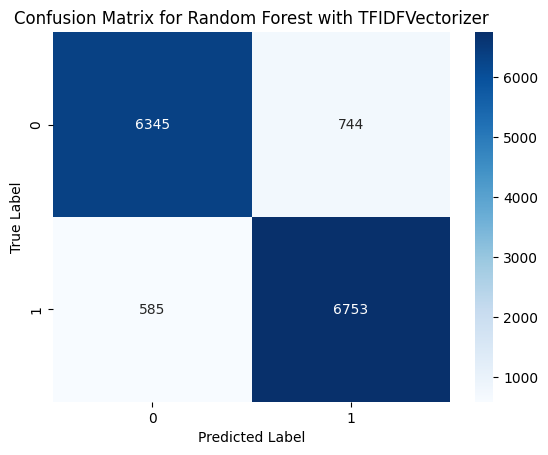

In [8]:
# Evaluation and Results Visualization
def evaluate_model(y_test, y_pred, model_name):
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Evaluate each model
evaluate_model(y_test, y_pred_lr_count, "Logistic Regression with CountVectorizer")
evaluate_model(y_test, y_pred_lr_tfidf, "Logistic Regression with TFIDFVectorizer")
evaluate_model(y_test, y_pred_svc_count, "SVC with CountVectorizer")
evaluate_model(y_test, y_pred_svc_tfidf, "SVC with TFIDFVectorizer")
evaluate_model(y_test, y_pred_rf_count, "Random Forest with CountVectorizer")
evaluate_model(y_test, y_pred_rf_tfidf, "Random Forest with TFIDFVectorizer")


*we successfully developed a model to predict the authenticity of news titles as either fake or real using NLP and machine learning techniques. By applying text preprocessing steps such as tokenization, lemmatization, and data cleansing, we prepared the data for analysis. We then utilized CountVectorizer and TFIDFVectorizer to convert text data into numerical form, enabling the application of machine learning models like Logistic Regression, SVC, and Random Forest. Finally, we evaluated the models using classification reports and confusion matrices, demonstrating the effectiveness of our approach in distinguishing between fake and real news titles.*

*Multiple models were trained using both vectorization techniques, including Logistic Regression, Support Vector Machine (SVC), and Random Forest Classifier. The performance of these models was evaluated using classification reports and confusion matrices, which provided insight into the accuracy and effectiveness of each approach.*



In [9]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [10]:
!jupyter nbconvert --to PDF "drive/My drive/Name_of_your_file.ipynb"

[NbConvertApp] WARNING | pattern 'drive/My drive/Name_of_your_file.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_ye